In [19]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError

# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

import joblib


In [2]:
df = pd.read_csv('/workspaces/fraud/data/Base_100milfilas.csv')
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
2,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
3,0,0.5,0.674870,-1,372,30,0.004406,30.300980,AA,2069,...,0,1500.0,0,INTERNET,6.336455,other,1,1,0,0
4,0,0.6,0.084088,-1,104,30,0.011475,-1.793004,AB,1972,...,1,200.0,0,INTERNET,4.502007,macintosh,1,1,0,0


In [3]:
print("-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------\n")
# Divido el conjunto de datos en muestras de train y test
X = df.drop("fraud_bool", axis = 1)
y = df["fraud_bool"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------



,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.4,0.583827,-1,68,20,0.006838,-0.623856,AB,1190,7284.168113,...,1,200.0,0,INTERNET,3.646187,other,0,1,0,5
48955,0.3,0.706788,-1,43,30,0.011727,-1.242702,AC,1648,1416.276017,...,0,1000.0,0,INTERNET,11.068744,other,1,1,0,3
44966,0.8,0.853240,-1,110,40,0.008390,-1.054796,AB,560,6943.630975,...,1,200.0,0,INTERNET,2.724917,windows,0,1,0,3
13568,0.2,0.477645,-1,84,20,0.001862,-0.966041,AB,5443,8737.892629,...,1,200.0,0,INTERNET,5.096423,linux,1,1,0,1
92727,0.4,0.403605,-1,107,40,0.004380,-1.324126,AC,769,2193.293927,...,0,200.0,0,INTERNET,4.399542,linux,0,1,0,7


In [4]:
print("-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----\n")
# Identifico las variables numéricas automáticamente, excluyendo 'fraud_bool' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'fraud_bool']

# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplico el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplico el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Muestro las primeras filas de los datos escalados de entrenamiento
print(X_train_final.head())

-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----

         income  name_email_similarity  prev_address_months_count  \
75220 -0.605160               0.347933                   -0.38469   
48955 -0.949709               0.769626                   -0.38469   
44966  0.773033               1.271878                   -0.38469   
13568 -1.294257              -0.016217                   -0.38469   
92727 -0.605160              -0.270136                   -0.38469   

       current_address_months_count  customer_age  days_since_request  \
75220                     -0.240803     -1.164783           -0.185708   
48955                     -0.523928     -0.354168           -0.184804   
44966                      0.234846      0.456447           -0.185421   
13568                     -0.059604     -1.164783           -0.186628   
92727                      0.200871      0.456447           -0.186163   

       intended_balcon_amount  zip_count_4w  ve

In [5]:
print("-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------\n")
# Identifico variables categóricas automáticamente, como en este no hay aparecen en cero
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)

-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------

Variables categóricas:
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [6]:
print("--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------\n")
# Con un valor de k = 20
selection_model = SelectKBest(score_func=f_classif, k = 20)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------



/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,-0.605160,0.347933,-0.38469,-0.240803,-1.164783,-0.441118,0.550605,0.230802,-0.358997,0.137603,-0.248552,0.921357,1.223183,0.362025,1.943151,-0.678341,-0.17027,-1.114575,-0.124006,0.754420
1,-0.949709,0.769626,-0.38469,-0.523928,-0.354168,-0.472141,-1.402200,-0.508880,-0.391640,1.517827,0.735000,0.921357,1.223183,0.362025,-0.514628,0.875565,-0.17027,0.897203,-0.124006,-0.144274
2,0.773033,1.271878,-0.38469,0.234846,0.456447,-0.462721,0.437276,-0.092258,3.999844,-0.256746,-0.013054,-1.085356,-0.817539,0.362025,1.943151,-0.678341,-0.17027,-1.114575,-0.124006,-0.144274
3,-1.294257,-0.016217,-0.38469,-0.059604,-1.164783,-0.458272,1.034397,0.578012,-0.374230,1.715002,-0.220846,0.921357,-0.817539,0.362025,1.943151,-0.678341,-0.17027,0.897203,-0.124006,-1.042968
4,-0.605160,-0.270136,-0.38469,0.200871,0.456447,-0.476222,-1.143612,-1.355442,-0.391640,-0.453921,-0.858077,0.921357,-0.817539,0.362025,-0.514628,-0.678341,-0.17027,-1.114575,-0.124006,1.653114


In [7]:
X_test_sel.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,-0.605160,1.466971,-0.38469,-0.286103,-0.354168,2.171843,-0.428883,0.450258,-0.380759,-0.453921,0.208592,-1.085356,-0.817539,0.362025,-0.514628,-0.678341,-0.17027,-1.114575,-0.124006,0.754420
1,1.117581,1.767269,-0.38469,-0.082254,0.456447,-0.474092,-0.523904,-0.227987,-0.393816,-0.059571,-0.871930,-1.085356,-0.817539,0.362025,-0.514628,-0.678341,-0.17027,0.897203,-0.124006,1.203767
2,-0.949709,-0.823476,-0.38469,1.016270,0.456447,-0.441154,0.405564,-0.529227,-0.304593,-0.256746,-1.121282,-1.085356,1.223183,-2.762244,-0.514628,-0.678341,-0.17027,0.897203,-0.124006,-1.042968
3,-0.260612,-0.777975,-0.38469,0.393396,1.267063,-0.473463,-1.062823,-0.142747,-0.302417,1.912177,-0.345522,0.921357,1.223183,0.362025,-0.514628,-0.678341,-0.17027,-1.114575,-0.124006,0.754420
4,1.117581,-1.540773,-0.38469,-0.841028,-1.164783,-0.427234,-0.761192,-1.678282,-0.391640,-0.059571,0.845823,-1.085356,-0.817539,0.362025,-0.514628,0.856141,-0.17027,-1.114575,-0.124006,1.653114


In [8]:
print("----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------\n")
# Obtengo las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Creo un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Muestro las 20 mejores características con sus puntuaciones 

scores_df

----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------



,Características,Puntuaciones
10,date_of_birth_distinct_emails_4w,3407.222578
15,phone_mobile_valid,3196.139157
4,customer_age,2819.179894
17,proposed_credit_limit,1796.224252
0,income,1477.356137
9,bank_branch_count_8w,1371.699694
14,phone_home_valid,951.360409
1,name_email_similarity,951.202628
12,credit_risk_score,879.599580
3,current_address_months_count,830.790387


In [9]:
print("------------(2). APLICO MODELO DE RANDOMFOREST-------------")
# default n_estimators=100
model1 = RandomForestClassifier(random_state = 42)

------------(2). APLICO MODELO DE RANDOMFOREST-------------


In [10]:
print("--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------")
model1.fit(X_train_sel, y_train)

--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------


RandomForestClassifier(random_state=42)

--------------(4). GRAFICO 4 DE LOS 100 ARBOLES QUE TIENE POR DEFECTO------------


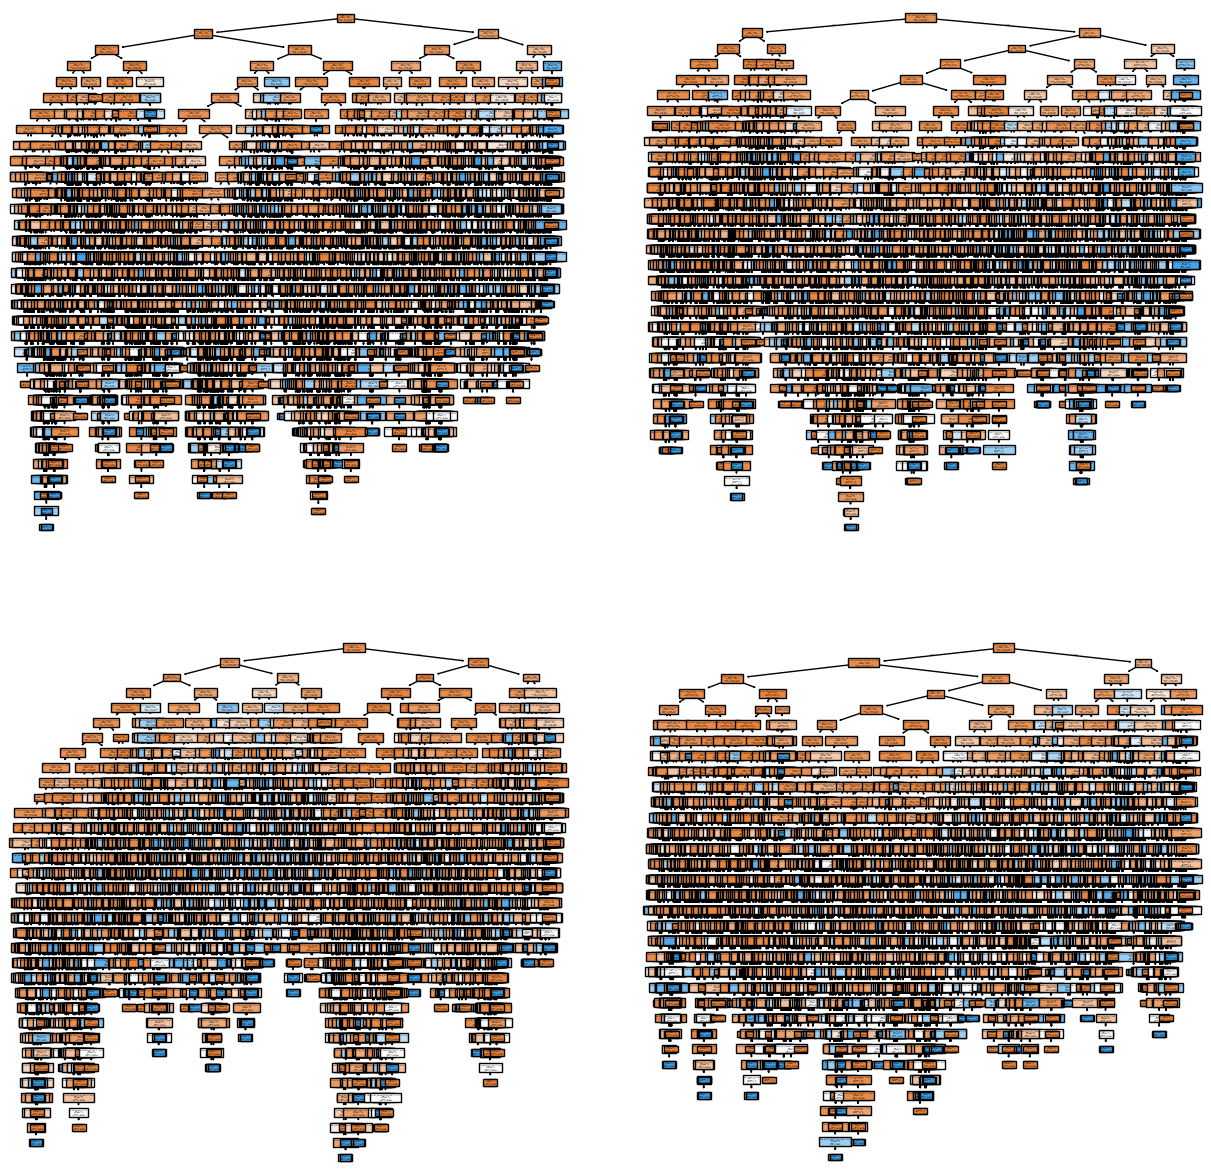

In [11]:
print("--------------(4). GRAFICO 4 DE LOS 100 ARBOLES QUE TIENE POR DEFECTO------------")
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["No Fraude", "Fraude"]
tree.plot_tree(model1.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_sel.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_sel.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_sel.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_sel.columns), class_names = clases, filled = True)

plt.show()

In [12]:
print("--------------(5). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------")
y_pred_test = model1.predict(X_test_sel)
y_pred_test

--------------(5). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------


array([0, 0, 0, ..., 0, 0, 0], shape=(20000,))

In [13]:
print("------------(6). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------")
y_pred_train = model1.predict(X_train_sel)
y_pred_train

------------(6). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------


array([0, 0, 0, ..., 0, 0, 0], shape=(80000,))

In [14]:
print("--------------(7). REALIZO METRICAS PARA MEDIR LOS DATOS DE ENTRENAMIENTO Y PRUEBA MODELO ORIGINAL----------")
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test Random Forest inicial: ", accuracy_test)
print("F1 score Test Random Forest inicial: ", f1_score_test)
print("Precision Test Random Forest inicial: ", precision_test)
print("Recall Test Random Forest inicial: ", recall_test)

print("Accuracy Train Random Forest inicial: ", accuracy_train)
print("F1 score Train Random Forest inicial: ", f1_score_train)
print("Precision Train Random Forest inicial: ", precision_train)
print("Recall Train Random Forest inicial: ", recall_train)

--------------(7). REALIZO METRICAS PARA MEDIR LOS DATOS DE ENTRENAMIENTO Y PRUEBA MODELO ORIGINAL----------
Accuracy Test Random Forest inicial:  0.90375
F1 score Test Random Forest inicial:  0.90375
Precision Test Random Forest inicial:  0.90375
Recall Test Random Forest inicial:  0.90375
Accuracy Train Random Forest inicial:  0.999975
F1 score Train Random Forest inicial:  0.999975
Precision Train Random Forest inicial:  0.999975
Recall Train Random Forest inicial:  0.999975


In [15]:
print("----------(8). COMPARAMOS LAS METRICAS DE PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["No Fraude", "Fraude"]))

----------(8). COMPARAMOS LAS METRICAS DE PRUEBA-------------
              precision    recall  f1-score   support

   No Fraude       0.91      0.99      0.95     17800
      Fraude       0.70      0.22      0.34      2200

    accuracy                           0.90     20000
   macro avg       0.80      0.61      0.64     20000
weighted avg       0.89      0.90      0.88     20000



In [16]:
print("----------(9). COMPARAMOS LAS METRICAS DE ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["No Fraude", "Fraude"]))

----------(9). COMPARAMOS LAS METRICAS DE ENTRENAMIENTO-------------
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     71171
      Fraude       1.00      1.00      1.00      8829

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [20]:
# Definir la ruta donde se guardará el modelo
ruta_modelo = '/workspaces/fraud/models/modelo_Random_inicial.pkl'

# Verificar si el directorio existe, si no, crearlo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio)

# Guardar el modelo RandomForest
joblib.dump(model1, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /workspaces/fraud/models/modelo_Random_inicial.pkl


In [ ]:
print("-----------(10). DEFINO LOS HIPERPARAMETROS A MANO PARA LA REGULARIZACION-----------")
rf = RandomForestClassifier(random_state=42)
# Defino hiperparametros a mano
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
print("--------------(1). CONFIGURO Y EJECUTO EL GRIDSEARCH--------------")

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusto el modelo
grid_search.fit(X_train_data_final, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("LOS MEJORES HIPERPARAMETROS DEL GRIDSEARCHCV SON :", grid_search.best_params_)

In [ ]:
print("---------(12) DEFINO NUEVAMENTE EL MODELO CON LOS MEJORES HIPERPARAMETROS DEL RANDOMFOREST---------")
# Definir el modelo con los mejores hiperparámetros 
model2 = RandomForestClassifier(criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 20, n_estimators= 500)
print("--------------ENTRENO EL MODELO MEJORADO------------")
model2.fit(X_train_data_final, y_train)

In [ ]:
print("---------------(13). REALIZO LAS PREDICCIONES DEL ENTRENAMIENTO Y PRUEBA CON HIPERPARAMETROS AJUSTADOS--------")
# Predicciones y evaluación del modelo optimizado en el conjunto de prueba
y_pred_test_hp = model2.predict(X_test_data_final)
y_pred_train_hp = model2.predict(X_train_data_final)

accuracy_test = accuracy_score(y_test, y_pred_test_hp)
accuracy_train = accuracy_score(y_train, y_pred_train_hp)

f1_score_test = f1_score(y_test, y_pred_test_hp, average='micro')
f1_score_train = f1_score(y_train, y_pred_train_hp, average='micro')

precision_test = precision_score(y_test, y_pred_test_hp, average='micro')
precision_train = precision_score(y_train, y_pred_train_hp, average='micro')

recall_test = recall_score(y_test, y_pred_test_hp, average='micro')
recall_train = recall_score(y_train, y_pred_train_hp, average='micro')

print("Accuracy Test ajustado: ", accuracy_test)
print("F1 score Test ajustado: ", f1_score_test)
print("Precision Test ajustado: ", precision_test)
print("Recall Test ajustado: ", recall_test)

print("Accuracy Train ajustado: ", accuracy_train)
print("F1 score Train ajustado: ", f1_score_train)
print("Precision Train ajustado: ", precision_train)
print("Recall Train ajustado: ", recall_train)

In [ ]:
print("----------(14). COMPARAMOS LAS METRICAS DE LA PRUEBA CON HIPERPARAMETROS-------------")
print(classification_report(y_test, y_pred_test_hp, target_names=["Negativo", "Positivo"]))

In [ ]:
print("----------(15). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO CON HIPERPARAMETROS-------------")
print(classification_report(y_train, y_pred_train_hp, target_names=["Negativo", "Positivo"]))